<div class="alert alert-info" role="alert">
  <p>
    <center><b>Notebook Overview</b></center>
  </p>

  <p>
    <b>Steps:</b>
    <ul>
      <li> Business Understanding.</li>
      <li> Analysis of Data.</li>
      <li> Preprocessing.</li>
      <li> Build model.</li>
      <li> Evaluate.</li>
      <li> Communicate.</li>
    </ul>

  </p>
</div>

<font size="+3"><strong>1. Business Understanding</strong></font>

<font size="+1" color='purple'> Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.</font>

<font size="+3"><strong>2. Prepare Data</strong></font>

## Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import scipy

import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

from IPython.core.display import HTML
pd.options.display.max_rows = 30
pd.options.display.max_columns = 25

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(colorscale='plotly', world_readable=True)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from ipywidgets import interact, interact_manual, widgets


from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split , GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score , ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('breast-cancer.csv')

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Explore & Analyse

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Dataset Description:

The dataset contains information from 32 columns, comprising 31 numerical columns and 1 categorical column.

#### Numerical Columns:
- **Radius**
- **Texture**
- **Perimeter**
- **Area**
- **Smoothness**
- **Compactness**
- **Concavity**
- **Concave Points**
- **Symmetry**
- **Fractal Dimension**

These columns are further categorized into three groups:
- **10 columns** for mean measurements.
- **10 columns** for standard error measurements.
- **10 columns** for worst measurements.

#### Target Variable:
classify tumors as either benign or malignant.

In [3]:
# Drop ID column

df.drop('id', axis=1, inplace=True)

In [32]:
df.describe().T.style.background_gradient(cmap = sns.color_palette("ch:s=-.0,r=.6", as_cmap=True))

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.000000,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000
texture_mean,569.000000,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000
perimeter_mean,569.000000,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.500000
area_mean,569.000000,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.000000
smoothness_mean,569.000000,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.163400
compactness_mean,569.000000,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.345400
concavity_mean,569.000000,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.426800
concave points_mean,569.000000,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.201200
symmetry_mean,569.000000,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.304000
fractal_dimension_mean,569.000000,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.097440


In [33]:
px.histogram(data_frame=df, x='diagnosis', color='diagnosis',color_discrete_sequence=['#111111','#f6abb6'])

In [13]:
df['diagnosis'].value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

#### It shows us that we have an imbalanced dataset, where the benign class is 63%, compared to the malignant class, which is 37%

In [35]:
px.histogram(data_frame=df,x=df.area_mean,color='diagnosis',color_discrete_sequence=['#111111','#f6abb6'])

In [36]:
px.histogram(data_frame=df,x='smoothness_mean',color='diagnosis',color_discrete_sequence=['#111111','#f6abb6'])

In [4]:
# Convert the categorical data into numerical as (Malignant:1 ,Benign:0)
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int)

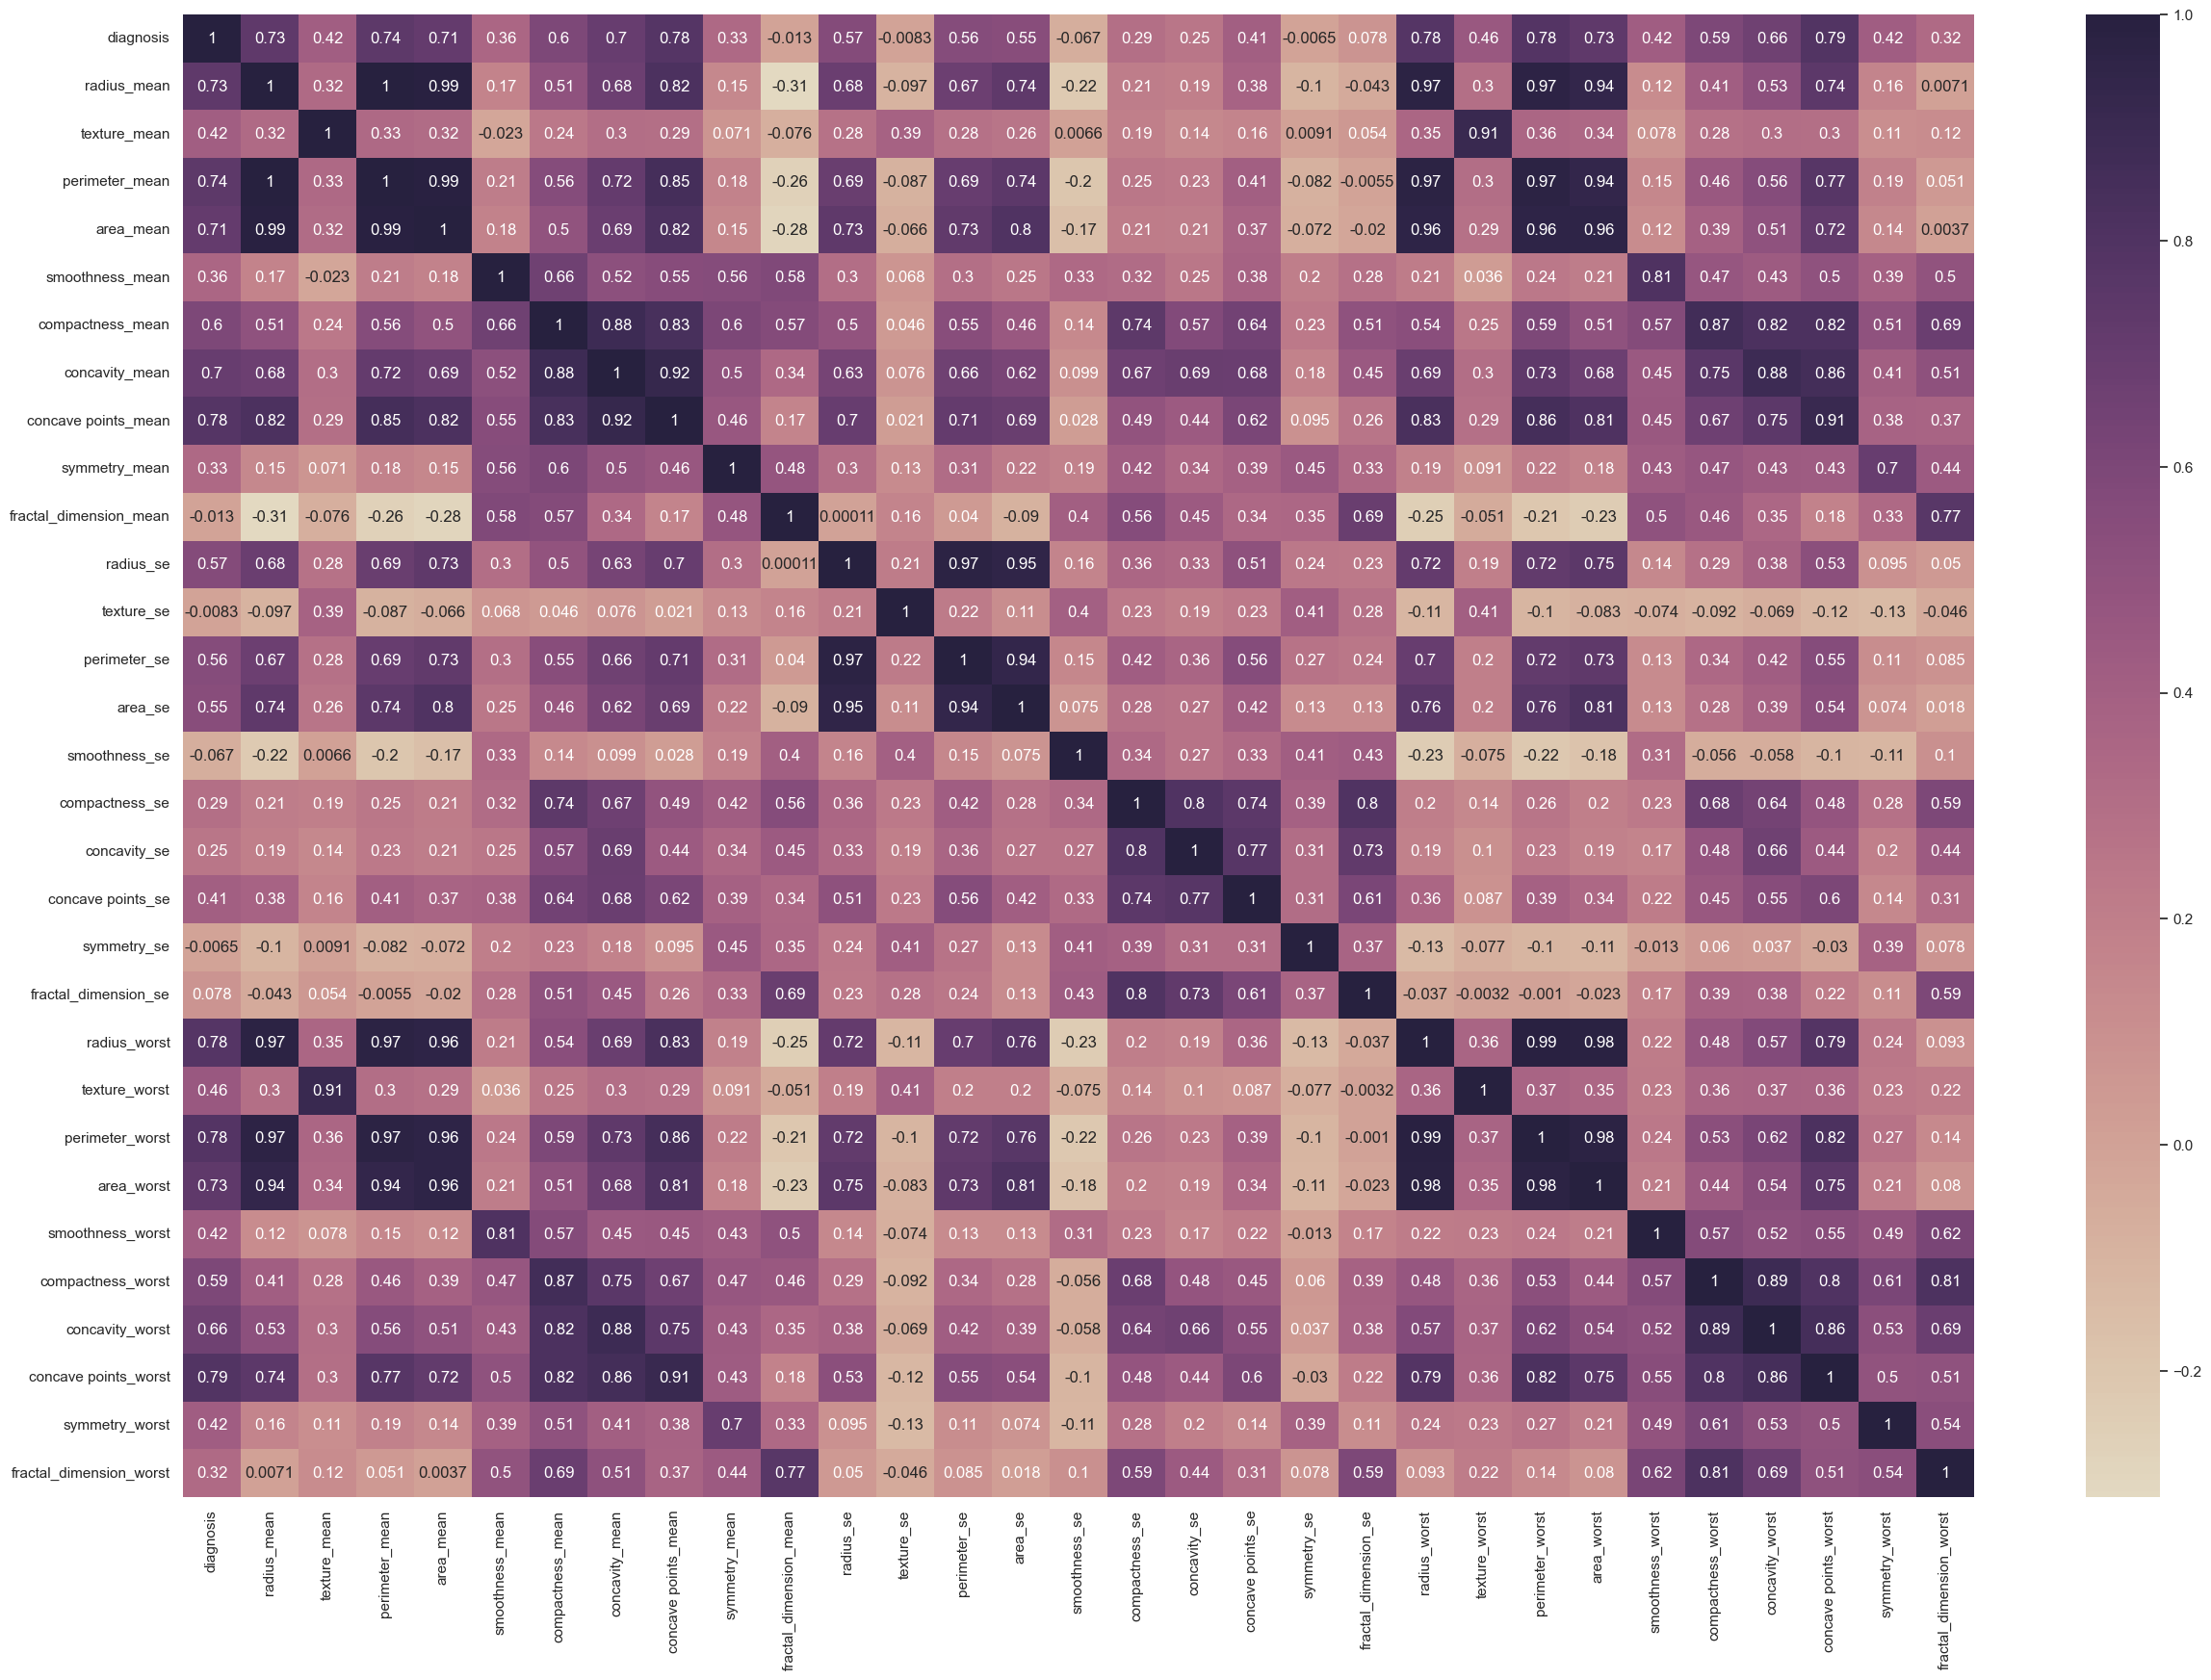

In [38]:
# Create a heatmap
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), annot=True, cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))
plt.show();

### Here are some scatterplots depicting positive linear regression, extracted from the heatmap analysis :

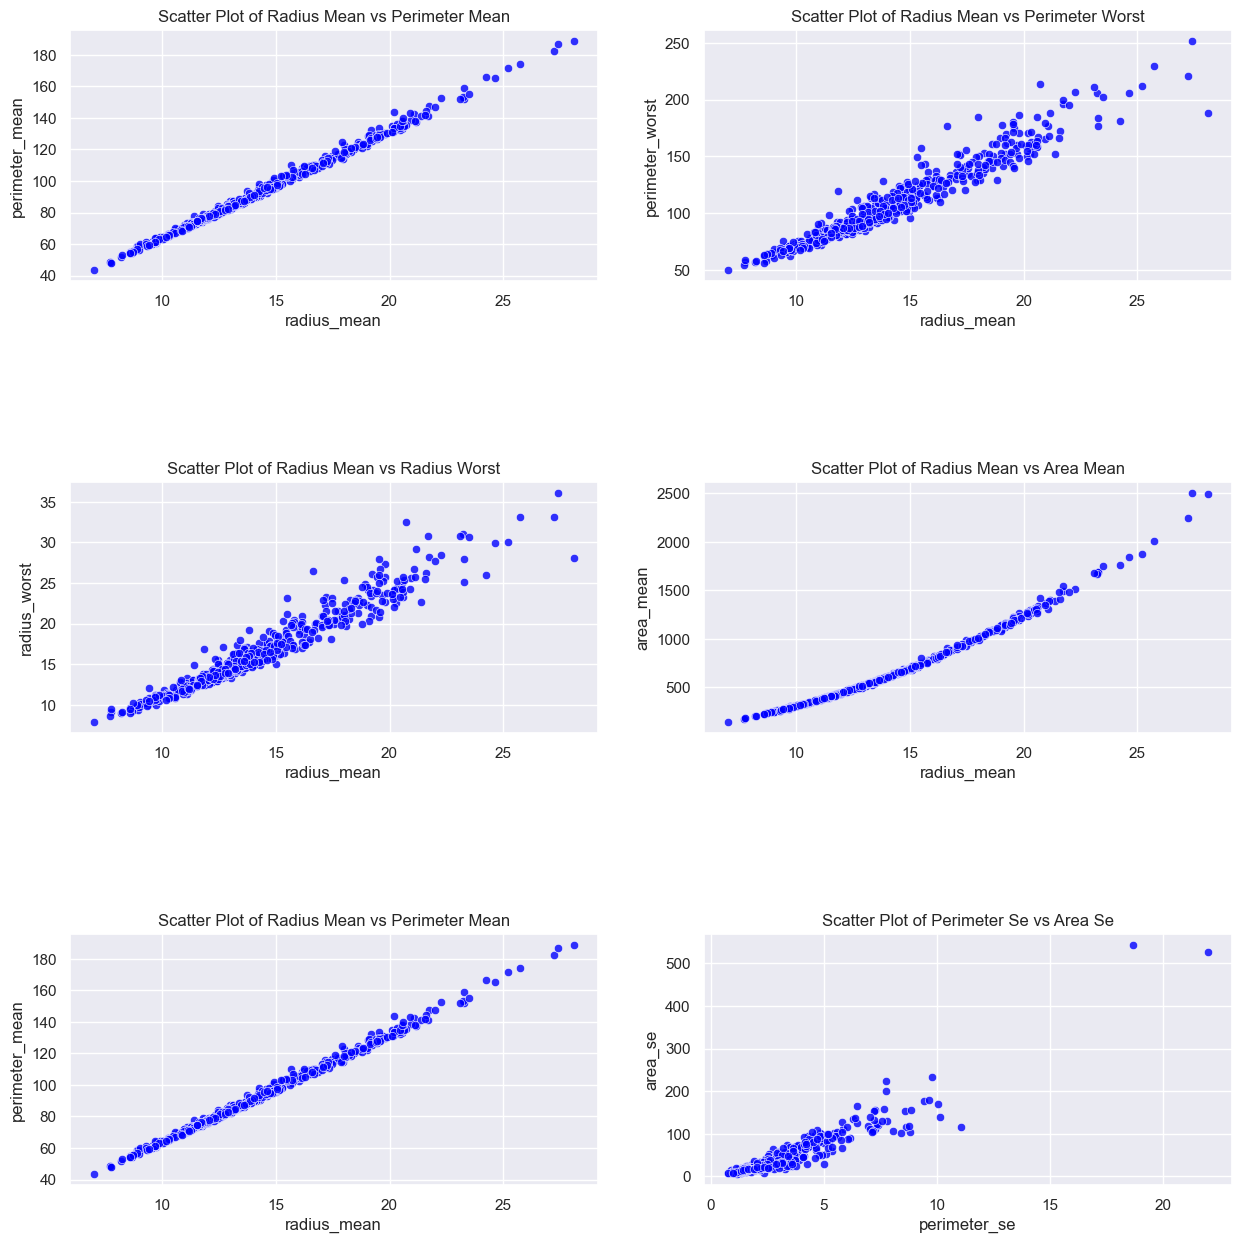

In [39]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(3, 2, figsize=(15, 15))  

plt.subplots_adjust(hspace=0.8)  

# Plot the first scatterplot
sns.scatterplot(x='radius_mean', y='perimeter_mean', data=df, color='blue', alpha=0.8 , ax=axs[0, 0])
axs[0, 0].set_title('Scatter Plot of Radius Mean vs Perimeter Mean')

# Plot the second scatterplot
sns.scatterplot(x='radius_mean', y='perimeter_worst', data=df, color='blue', alpha=0.8, ax=axs[0, 1])
axs[0, 1].set_title('Scatter Plot of Radius Mean vs Perimeter Worst')

# Plot the third scatterplot
sns.scatterplot(x='radius_mean', y='radius_worst', data=df, color='blue', alpha=0.8, ax=axs[1, 0])
axs[1, 0].set_title('Scatter Plot of Radius Mean vs Radius Worst')

# Plot the fourth scatterplot
sns.scatterplot(x='radius_mean', y='area_mean', data=df, color='blue', alpha=0.8, ax=axs[1, 1])
axs[1, 1].set_title('Scatter Plot of Radius Mean vs Area Mean')

# Plot the fifth scatterplot
sns.scatterplot(x='radius_mean', y='perimeter_mean', data=df, color='blue', alpha=0.8, ax=axs[2, 0])
axs[2, 0].set_title('Scatter Plot of Radius Mean vs Perimeter Mean')

# Plot the sixth scatterplot
sns.scatterplot(x='perimeter_se', y='area_se', data=df, color='blue', alpha=0.8)
axs[2, 1].set_title('Scatter Plot of Perimeter Se vs Area Se')

plt.show();

### we construct a widget that quickly finds the correlation between two columns in the dataset.

In [5]:
@interact
def correlations(column1=list(df.select_dtypes('number').columns),
                 column2=list(df.select_dtypes('number').columns)):
    print(f"Correlation: {df[column1].corr(df[column2])}")

interactive(children=(Dropdown(description='column1', options=('diagnosis', 'radius_mean', 'texture_mean', 'pe…

In [6]:
@interact
def scatter_plot(x=list(df.select_dtypes('number').columns),
                 y=list(df.select_dtypes('number').columns)[1:]):
    if x == y:
        print(f"Please select separate variables for X and Y")
    else:
        df.iplot(kind='scatter', x=x, y=y, mode='markers',
                 xTitle=x.title(), yTitle=y.title(), title=f'{y.title()} vs {x.title()}')

interactive(children=(Dropdown(description='x', options=('diagnosis', 'radius_mean', 'texture_mean', 'perimete…

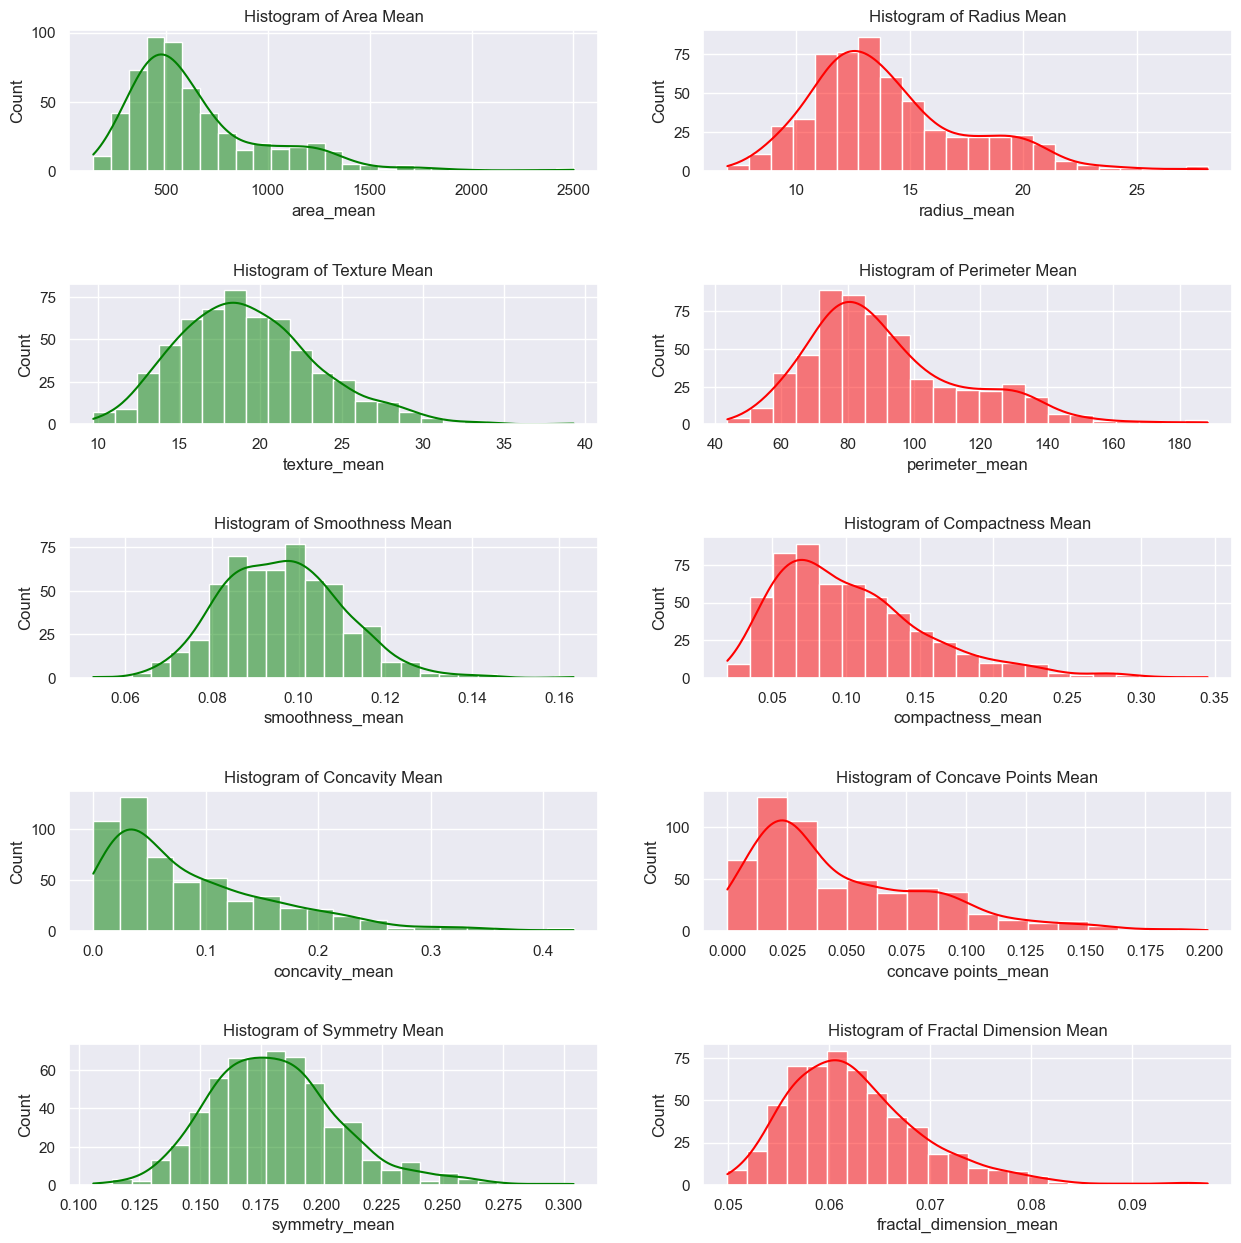

In [42]:
# Set the style
sns.set(style="darkgrid")

# Create two separate subplots
fig, axs = plt.subplots(5, 2, figsize=(15, 15))  # Increase the figure size

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.8)  # Increase the vertical spacing

# Plot the first histogram
sns.histplot(data=df, x="area_mean", kde=True, ax=axs[0, 0], color='green')
axs[0, 0].set_title('Histogram of Area Mean')

# Plot the second histogram
sns.histplot(data=df, x="radius_mean", kde=True, ax=axs[0, 1], color='red')
axs[0, 1].set_title('Histogram of Radius Mean')

# Plot the third histogram
sns.histplot(data=df, x="texture_mean", kde=True, ax=axs[1, 0], color='green')
axs[1, 0].set_title('Histogram of Texture Mean')

# Plot the fourth histogram
sns.histplot(data=df, x="perimeter_mean", kde=True, ax=axs[1, 1], color='red')
axs[1, 1].set_title('Histogram of Perimeter Mean')

# Plot the fifth histogram
sns.histplot(data=df, x="smoothness_mean", kde=True, ax=axs[2, 0], color='green')
axs[2, 0].set_title('Histogram of Smoothness Mean')

# Plot the sixth histogram
sns.histplot(data=df, x="compactness_mean", kde=True, ax=axs[2, 1], color='red')
axs[2, 1].set_title('Histogram of Compactness Mean')

# Plot the seventh histogram
sns.histplot(data=df, x="concavity_mean", kde=True, ax=axs[3, 0], color='green')
axs[3, 0].set_title('Histogram of Concavity Mean')

# Plot the eighth histogram
sns.histplot(data=df, x="concave points_mean", kde=True, ax=axs[3, 1], color='red')
axs[3, 1].set_title('Histogram of Concave Points Mean')

# Plot the ninth histogram
sns.histplot(data=df, x="symmetry_mean", kde=True, ax=axs[4, 0], color='green')
axs[4, 0].set_title('Histogram of Symmetry Mean')

# Plot the tenth histogram
sns.histplot(data=df, x="fractal_dimension_mean", kde=True, ax=axs[4, 1], color='red')
axs[4, 1].set_title('Histogram of Fractal Dimension Mean')

plt.show();

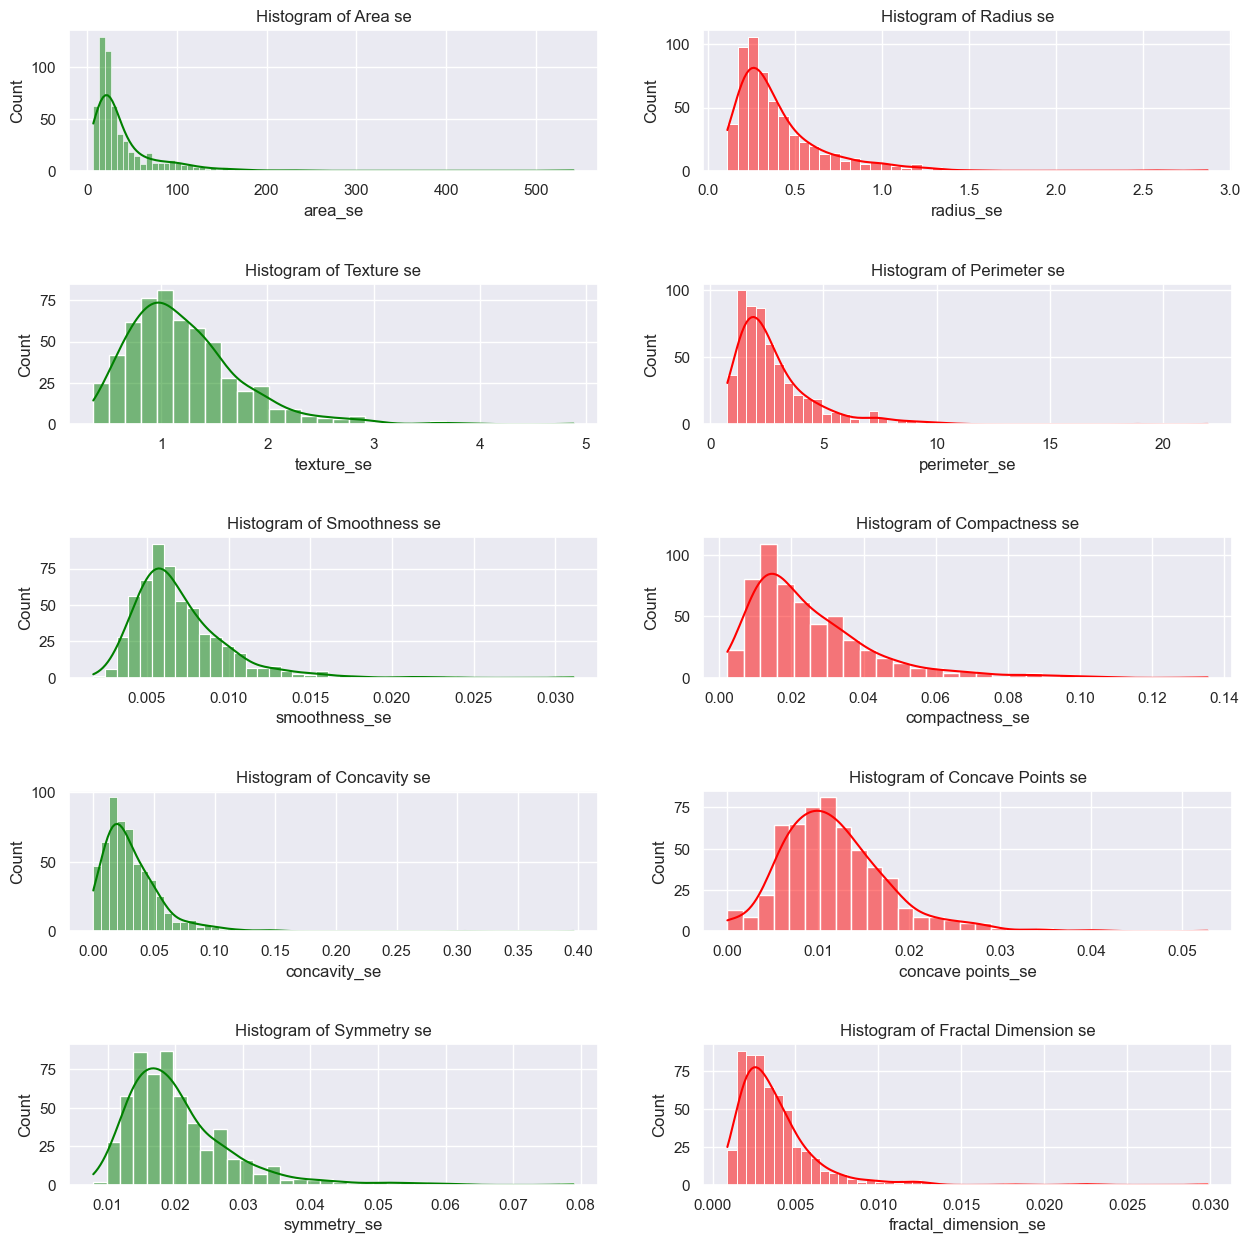

In [43]:
# Set the style
sns.set(style="darkgrid")

# Create two separate subplots
fig, axs = plt.subplots(5, 2, figsize=(15, 15))

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.8)

# Plot the first histogram
sns.histplot(data=df, x="area_se", kde=True, ax=axs[0, 0], color='green')
axs[0, 0].set_title('Histogram of Area se')

# Plot the second histogram
sns.histplot(data=df, x="radius_se", kde=True, ax=axs[0, 1], color='red')
axs[0, 1].set_title('Histogram of Radius se')

# Plot the third histogram
sns.histplot(data=df, x="texture_se", kde=True, ax=axs[1, 0], color='green')
axs[1, 0].set_title('Histogram of Texture se')

# Plot the fourth histogram
sns.histplot(data=df, x="perimeter_se", kde=True, ax=axs[1, 1], color='red')
axs[1, 1].set_title('Histogram of Perimeter se')

# Plot the fifth histogram
sns.histplot(data=df, x="smoothness_se", kde=True, ax=axs[2, 0], color='green')
axs[2, 0].set_title('Histogram of Smoothness se')

# Plot the sixth histogram
sns.histplot(data=df, x="compactness_se", kde=True, ax=axs[2, 1], color='red')
axs[2, 1].set_title('Histogram of Compactness se')

# Plot the seventh histogram
sns.histplot(data=df, x="concavity_se", kde=True, ax=axs[3, 0], color='green')
axs[3, 0].set_title('Histogram of Concavity se')

# Plot the eighth histogram
sns.histplot(data=df, x="concave points_se", kde=True, ax=axs[3, 1], color='red')
axs[3, 1].set_title('Histogram of Concave Points se')

# Plot the ninth histogram
sns.histplot(data=df, x="symmetry_se", kde=True, ax=axs[4, 0], color='green')
axs[4, 0].set_title('Histogram of Symmetry se')

# Plot the tenth histogram
sns.histplot(data=df, x="fractal_dimension_se", kde=True, ax=axs[4, 1], color='red')
axs[4, 1].set_title('Histogram of Fractal Dimension se')

plt.show();

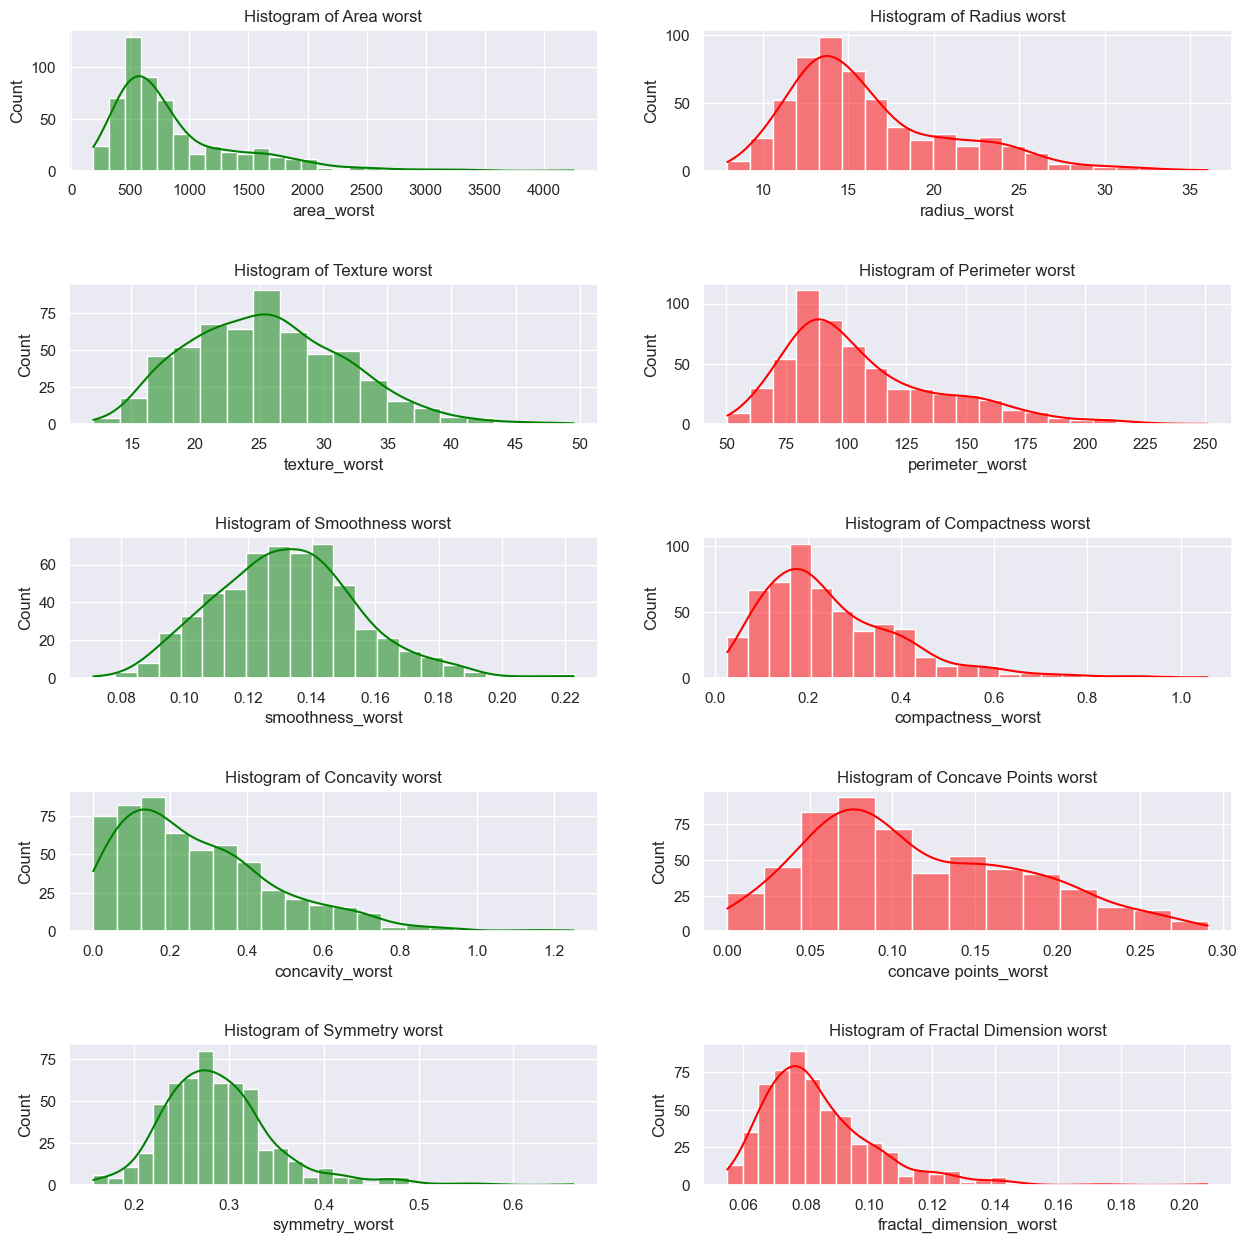

In [44]:
# Set the style
sns.set(style="darkgrid")

# Create two separate subplots
fig, axs = plt.subplots(5, 2, figsize=(15, 15))

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.8)

# Plot the first histogram
sns.histplot(data=df, x="area_worst", kde=True, ax=axs[0, 0], color='green')
axs[0, 0].set_title('Histogram of Area worst')

# Plot the second histogram
sns.histplot(data=df, x="radius_worst", kde=True, ax=axs[0, 1], color='red')
axs[0, 1].set_title('Histogram of Radius worst')

# Plot the third histogram
sns.histplot(data=df, x="texture_worst", kde=True, ax=axs[1, 0], color='green')
axs[1, 0].set_title('Histogram of Texture worst')

# Plot the fourth histogram
sns.histplot(data=df, x="perimeter_worst", kde=True, ax=axs[1, 1], color='red')
axs[1, 1].set_title('Histogram of Perimeter worst')

# Plot the fifth histogram
sns.histplot(data=df, x="smoothness_worst", kde=True, ax=axs[2, 0], color='green')
axs[2, 0].set_title('Histogram of Smoothness worst')

# Plot the sixth histogram
sns.histplot(data=df, x="compactness_worst", kde=True, ax=axs[2, 1], color='red')
axs[2, 1].set_title('Histogram of Compactness worst')

# Plot the seventh histogram
sns.histplot(data=df, x="concavity_worst", kde=True, ax=axs[3, 0], color='green')
axs[3, 0].set_title('Histogram of Concavity worst')

# Plot the eighth histogram
sns.histplot(data=df, x="concave points_worst", kde=True, ax=axs[3, 1], color='red')
axs[3, 1].set_title('Histogram of Concave Points worst')

# Plot the ninth histogram
sns.histplot(data=df, x="symmetry_worst", kde=True, ax=axs[4, 0], color='green')
axs[4, 0].set_title('Histogram of Symmetry worst')

# Plot the tenth histogram
sns.histplot(data=df, x="fractal_dimension_worst", kde=True, ax=axs[4, 1], color='red')
axs[4, 1].set_title('Histogram of Fractal Dimension worst')

plt.show();

### We conclude that most of these graphs tend to exhibit a normal distribution, while some show a tendency towards positive skewness

<font size="+3"><strong>3. Preprocessing</strong></font>

## Split

In [45]:
target = 'diagnosis'
X = df.drop(columns=target)
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (569, 30)
y shape: (569,)


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) 

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (455, 30)
y_train shape: (455,)
X_test shape: (114, 30)
y_test shape: (114,)


In [47]:
scaler = StandardScaler() 
scaler.fit(X_train) 

scaler.transform(X_train) 
scaler.transform(X_test)

StandardScaler()

array([[-1.44075296, -0.43531947, -1.36208497, ...,  0.9320124 ,
         2.09724217,  1.88645014],
       [ 1.97409619,  1.73302577,  2.09167167, ...,  2.6989469 ,
         1.89116053,  2.49783848],
       [-1.39998202, -1.24962228, -1.34520926, ..., -0.97023893,
         0.59760192,  0.0578942 ],
       ...,
       [ 0.04880192, -0.55500086, -0.06512547, ..., -1.23903365,
        -0.70863864, -1.27145475],
       [-0.03896885,  0.10207345, -0.03137406, ...,  1.05001236,
         0.43432185,  1.21336207],
       [-0.54860557,  0.31327591, -0.60350155, ..., -0.61102866,
        -0.3345212 , -0.84628745]])

array([[-0.46649743, -0.13728933, -0.44421138, ..., -0.19435087,
         0.17275669,  0.20372995],
       [ 1.36536344,  0.49866473,  1.30551088, ...,  0.99177862,
        -0.561211  , -1.00838949],
       [ 0.38006578,  0.06921974,  0.40410139, ...,  0.57035018,
        -0.10783139, -0.20629287],
       ...,
       [-0.73547237, -0.99852603, -0.74138839, ..., -0.27741059,
        -0.3820785 , -0.32408328],
       [ 0.02898271,  2.0334026 ,  0.0274851 , ..., -0.49027026,
        -1.60905688, -0.33137507],
       [ 1.87216885,  2.80077153,  1.80354992, ...,  0.7925579 ,
        -0.05868885, -0.09467243]])

<font size="+3"><strong>4. Build Model</strong></font>

In [48]:
def train_evaluate_model(model, X_train, y_train, X_test,y_test):
    
    model.fit(X_train, y_train)  #fit the model instance 


    predictions = model.predict(X_test) # calculate predictions

    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)

    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall]], columns=['accuracy',
                                                   'f1_score', 'precision', 'recall'])
    return eval_df

In [49]:
lg = LogisticRegression(max_iter=40)

results = train_evaluate_model(lg, X_train, y_train, X_test, y_test)

results.index = ['LogisticRegression']

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [50]:
decision_tree = DecisionTreeClassifier(max_leaf_nodes=10)
decision_tree_results = train_evaluate_model(decision_tree,X_train, y_train, X_test, y_test)

decision_tree_results.index = ['DecisionTree']

results = results.append(decision_tree_results)

In [51]:
KNN = KNeighborsClassifier(n_neighbors=11)

knn = train_evaluate_model(KNN, X_train, y_train, X_test, y_test)
knn.index =['KNearsNeighbors']
results = results.append(knn)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [52]:
rfc = RandomForestClassifier(n_estimators=10)

rfc_result = train_evaluate_model(rfc, X_train, y_train, X_test, y_test)
rfc_result.index = ['RandomForest']

results = results.append(rfc_result)

In [53]:
Naive_Bayes = GaussianNB()
Naive_Bayes_result = train_evaluate_model(Naive_Bayes, X_train, y_train, X_test, y_test)
Naive_Bayes_result.index = ['NaiveBayes']

results = results.append(Naive_Bayes_result)

<font size="+3"><strong>5. Evaluate</strong></font>

In [54]:
results.head(6).sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall
KNearsNeighbors,0.982456,0.976190,1.000000,0.953488
RandomForest,0.973684,0.963855,1.000000,0.930233
NaiveBayes,0.973684,0.963855,1.000000,0.930233
LogisticRegression,0.964912,0.952381,0.975610,0.930233
DecisionTree,0.956140,0.941176,0.952381,0.930233


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



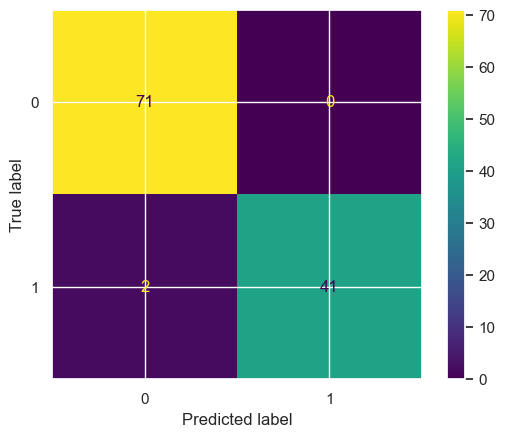

In [55]:
ConfusionMatrixDisplay.from_estimator(KNN , X_test , y_test);

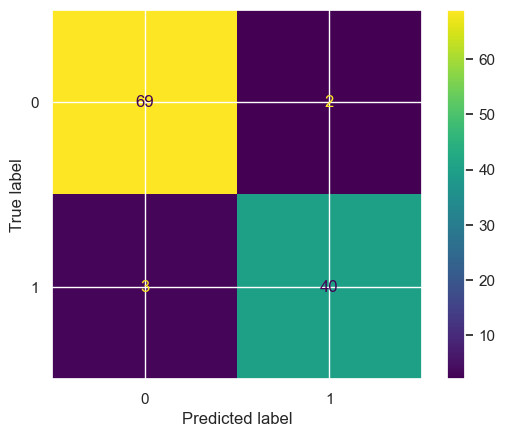

In [56]:
ConfusionMatrixDisplay.from_estimator(decision_tree , X_test , y_test);

<font size="+3"><strong>6. Communicate</strong></font>

Now that we have a reasonable model, let's graph the importance of each feature.

A horizontal bar chart with the 10 most important features for `DecisionTree model`

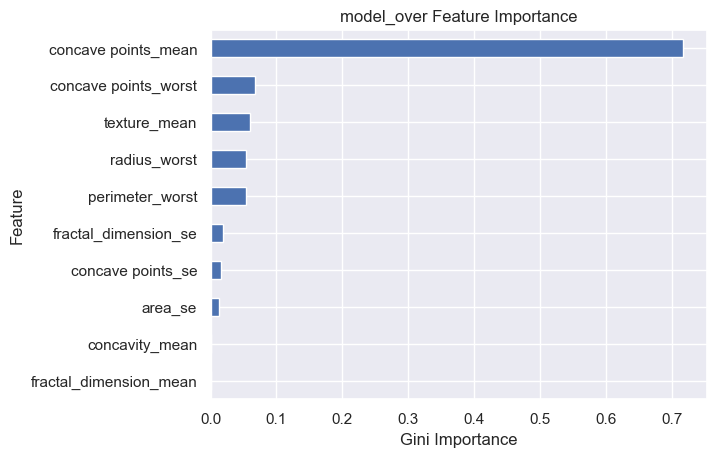

In [57]:
# Get importances
importances = decision_tree.feature_importances_

# Put importances into a Series
feat_imp = pd.Series(importances , index=X_train.columns).sort_values()

# Plot series
feat_imp.tail(10).plot(kind='barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("model_over Feature Importance");